<a href="https://colab.research.google.com/github/Merina62/AI-and-ML/blob/main/MerinaShrestha_Worksheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Merina Shrestha

Student no: np03cs4a220406

**Implement an End to End CNN Model for Image Classification Task.**

Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class.

Visualizing TRAIN samples


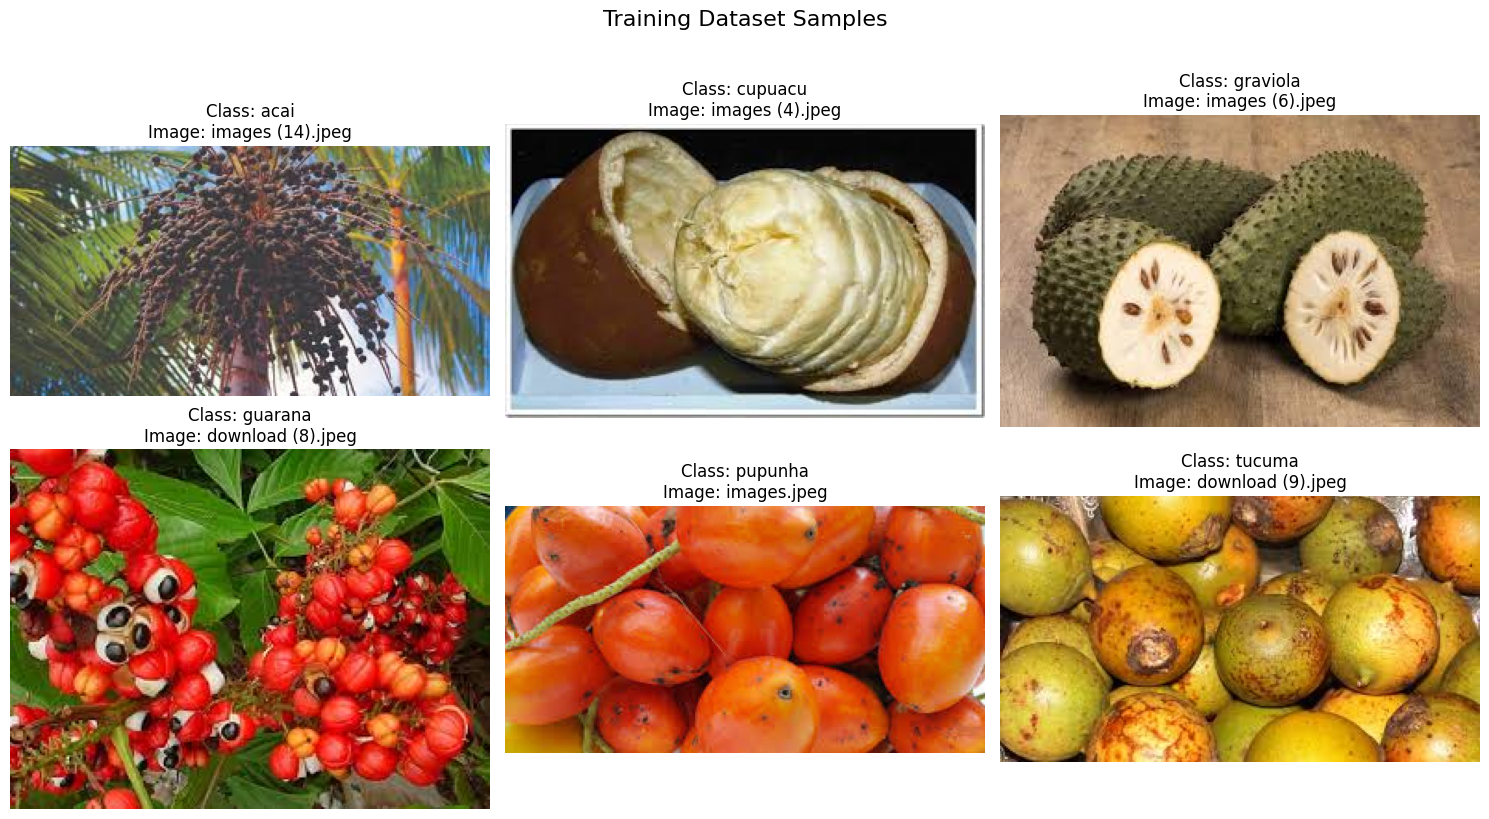

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_random_samples(train_path, test_path=None, rows=2):

    # Function to process a single directory
    def process_directory(dataset_path, title_prefix=""):
        class_dirs = sorted([d for d in os.listdir(dataset_path)
                           if os.path.isdir(os.path.join(dataset_path, d))])

        num_classes = len(class_dirs)
        cols = (num_classes + 1) // rows

        plt.figure(figsize=(15, 8))
        plt.suptitle(f"{title_prefix} Dataset Samples", y=1.02, fontsize=16)

        for i, class_dir in enumerate(class_dirs):
            class_path = os.path.join(dataset_path, class_dir)
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if not images:
                print(f"No images found in class: {class_dir}")
                continue

            random_image = random.choice(images)
            img_path = os.path.join(class_path, random_image)

            img = Image.open(img_path)

            ax = plt.subplot(rows, cols, i+1)
            ax.imshow(img)
            ax.set_title(f"Class: {class_dir}\nImage: {random_image}")
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    print("Visualizing TRAIN samples")
    process_directory(train_path, "Training")

train_path = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"

visualize_random_samples(train_path)

In [3]:
import os
from PIL import Image
from PIL import UnidentifiedImageError

def check_and_remove_corrupted_images(dataset_path):
    """Check for and remove corrupted images in a directory tree.

    Args:
        dataset_path: Path to the root directory containing images

    Returns:
        List of paths to corrupted images that were removed
    """
    corrupted_images = []

    for root, _, files in os.walk(dataset_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, filename)
                try:
                    # Verify image integrity
                    with Image.open(file_path) as img:
                        img.verify()  # Verify without loading entire image
                        img.close()   # Explicit close (redundant with 'with' but safe)

                except (IOError, SyntaxError, UnidentifiedImageError) as e:
                    # Handle corrupted image
                    corrupted_images.append(file_path)
                    os.remove(file_path)
                    print(f"Removed corrupted image: {file_path} (Error: {str(e)})")

    # Final report
    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"\nSummary: Removed {len(corrupted_images)} corrupted images.")

    return corrupted_images


train_path = "/content/drive/MyDrive/AI/FruitinAmazon/train"
check_and_remove_corrupted_images(train_path)

No corrupted images found.


[]

Task 2: Loading and Preprocessing Image Data in keras:

In [5]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
train_dir = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1. / 255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))


# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3 - Implement a CNN with

In [6]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128, 128, 3), num_classes=10):
    """
    Builds a CNN model with the specified architecture:

    Convolutional Architecture:
    - Conv Layer 1: 32 filters (3x3), same padding, stride 1, ReLU
    - MaxPool 1: (2x2), stride 2
    - Conv Layer 2: 32 filters (3x3), same padding, stride 1, ReLU
    - MaxPool 2: (2x2), stride 2

    Fully Connected Architecture:
    - Flatten layer
    - Dense layer: 128 neurons, ReLU
    - Dense layer: 64 neurons, ReLU
    - Output layer: num_classes neurons, softmax
    """
    model = models.Sequential()

    # Convolutional Architecture
    # Block 1
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu',
                            input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Block 2
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Fully Connected Network Architecture
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model instance
cnn_model = build_cnn_model()

# Print the model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile and Train the Model

In [7]:
from tensorflow.keras import optimizers, callbacks

# Compile the model
cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Adam optimizer with default learning rate
    loss="sparse_categorical_crossentropy",  # Suitable for integer labels
    metrics=["accuracy"]  # Track accuracy
)

# Define callbacks
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy")
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

# Train the model
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=16,  # Set batch size
    epochs=250,  # Number of epochs
    callbacks=[checkpoint_cb, early_stopping_cb],  # Save best model & avoid overfitting
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1094 - loss: 2.4357

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.1133 - loss: 2.4626 - val_accuracy: 0.8333 - val_loss: 1.1001
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 0.2218 - loss: 2.0432 - val_accuracy: 0.0000e+00 - val_loss: 1.6867
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 0.2010 - loss: 1.7235 - val_accuracy: 0.1667 - val_loss: 1.7170
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - accuracy: 0.4627 - loss: 1.5638 - val_accuracy: 0.6667 - val_loss: 1.3857
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 735ms/step - accuracy: 0.5109 - loss: 1.2804 - val_accuracy: 0.8333 - val_loss: 0.8158
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6181 - loss: 1.0416 - val_accuracy: 0.5000 - val_loss: 1.2634
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7461 - loss: 0.8475 - val_accuracy: 0.6667 - val_loss: 0.9176
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8346 - loss: 0.6664 - val_accuracy: 0.7222 - val_loss: 0.6148
Epo

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 602ms/step - accuracy: 1.0000 - loss: 0.0727 - val_accuracy: 0.8889 - val_loss: 0.4020
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 1.0000 - loss: 0.0294 - val_accuracy: 0.8333 - val_loss: 0.5307
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 667ms/step - accuracy: 1.0000 - loss: 0.0426 - val_accuracy: 0.8333 - val_loss: 0.5693
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 1.0000 - loss: 0.0231 - val_accuracy: 0.7778 - val_loss: 0.4076
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 819ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.8889 - val_loss: 0.3233
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.8889 - val_loss: 0.3393
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8889 - val_loss: 0.3722
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.8889 - val_lo

Task 5: Evaluate the Model

In [8]:
# Load the best saved model
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(train_ds)

print(f"Training Loss: {test_loss:.4f}")
print(f"Training Accuracy: {test_accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0330
Training Loss: 0.0314
Training Accuracy: 1.0000


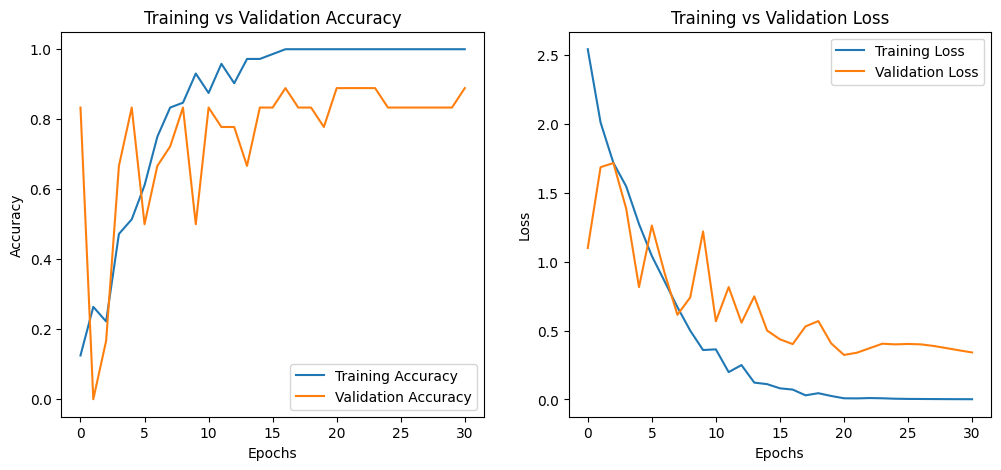

In [9]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs_range = range(len(train_loss))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


Task 6: Save and Load the Model

In [10]:
from tensorflow.keras.models import load_model

# Load the model from file
loaded_model = load_model('best_model.h5')

# Verify the loaded model
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,972 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Task 7: Predictions and Classification Report

In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/test',
    image_size=(128, 128),
    batch_size= 32
)

rescale = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [13]:
train_path = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"
class_names = sorted([d for d in os.listdir(train_path)
                    if os.path.isdir(os.path.join(train_path, d))])
print("Class names:", class_names)

Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [14]:
import numpy as np
from sklearn.metrics import classification_report


# Make predictions on the test dataset
y_pred_probs = best_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.25      0.40      0.31         5
     cupuacu       0.40      0.40      0.40         5
    graviola       0.29      0.40      0.33         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.20        30
   macro avg       0.16      0.20      0.17        30
weighted avg       0.16      0.20      0.17        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
